In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
train = pd.read_csv('./framingham.csv')

In [42]:
train.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [43]:
train[['BMI','currentSmoker']].head()

,BMI,currentSmoker
0,26.97,0
1,28.73,0
2,25.34,1
3,28.58,1
4,23.10,1


<Axes: xlabel='BMI', ylabel='currentSmoker'>

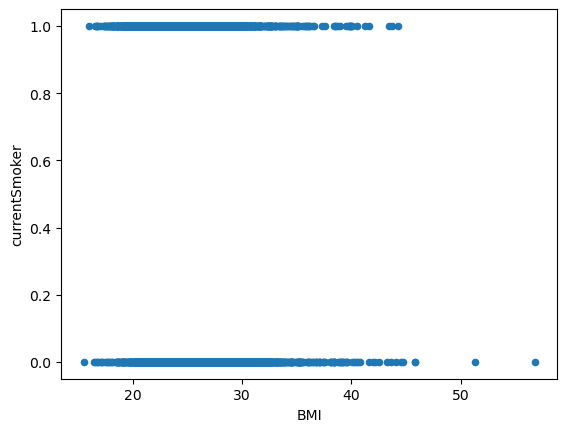

In [44]:
train[['BMI','currentSmoker']].plot.scatter(x='BMI',y='currentSmoker')

In [45]:
w = 0.09
b = -3.6

In [46]:
x = np.linspace(0,train['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

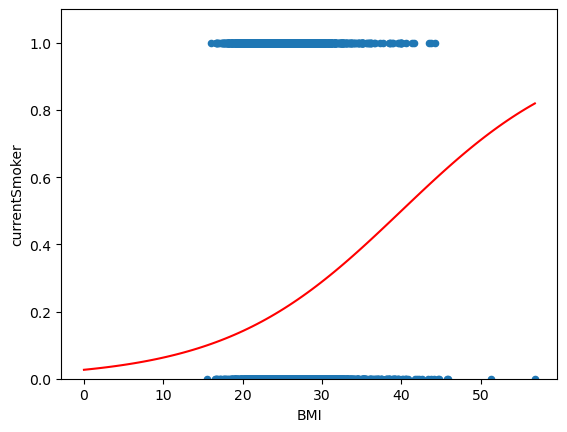

In [47]:
train.plot.scatter(x='BMI',y='currentSmoker')
plt.plot(x, y, '-r')
plt.ylim(0,train['currentSmoker'].max()*1.1)
# plt.grid()
plt.show()

In [48]:
train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))

In [49]:
train['loss_xi'] = -train['currentSmoker']*np.log(train['sigmoid'])-(1-train['currentSmoker'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

0.9207993112081031

In [50]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

In [51]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [52]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*df['w']+df['b'])))
    train['loss_xi'] = -train['currentSmoker']*np.log(train['sigmoid'])-(1-train['currentSmoker'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [53]:
df['error'] = df.apply(sum_error_df, axis=1)

In [54]:
df.sort_values(by=['error']).head()

,w,b,error
699,0.11,-3.01,0.757788
698,0.11,-3.02,0.758169
697,0.11,-3.03,0.758575
696,0.11,-3.04,0.759004
695,0.11,-3.05,0.759456


In [55]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [56]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,1.423323,1.419014,1.414712,1.410415,1.406125,1.401840,1.397562,1.393290,1.389025,1.384766,...,1.066620,1.063104,1.059601,1.056109,1.052631,1.049164,1.045710,1.042269,1.038841,1.035426
0.06,1.318372,1.314242,1.310118,1.306003,1.301895,1.297795,1.293702,1.289617,1.285541,1.281472,...,0.984878,0.981715,0.978566,0.975432,0.972312,0.969208,0.966118,0.963043,0.959984,0.956939
0.07,1.218875,1.214966,1.211067,1.207177,1.203297,1.199426,1.195565,1.191713,1.187871,1.184038,...,0.913507,0.910759,0.908027,0.905312,0.902614,0.899934,0.897270,0.894625,0.891996,0.889385
0.08,1.126151,1.122516,1.118892,1.115279,1.111678,1.108088,1.104510,1.100943,1.097388,1.093845,...,0.854169,0.851896,0.849642,0.847407,0.845191,0.842995,0.840819,0.838662,0.836524,0.834407
0.09,1.041679,1.038373,1.035081,1.031802,1.028536,1.025285,1.022047,1.018823,1.015613,1.012417,...,0.808387,0.806643,0.804921,0.803220,0.801540,0.799882,0.798244,0.796629,0.795035,0.793463


In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

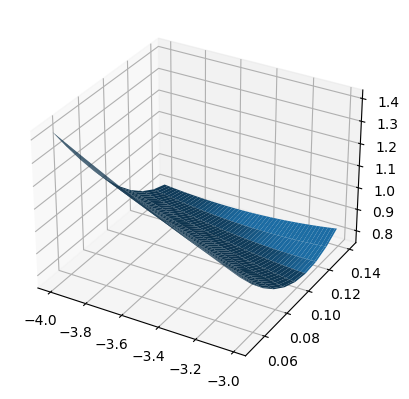

In [58]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

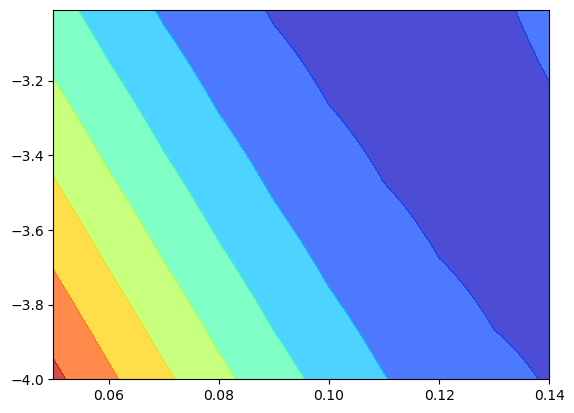

In [59]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [60]:
def delta_j_w(w, b):
    train['currentSmoker'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['currentSmoker'])*train['BMI']
    derivative = train['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['currentSmoker'])
    derivative = train['partial_loss'].mean()
    return(derivative) 

In [61]:
w_0 = 0.09
b_0 = -3.57

In [66]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

0.07810077536372396 -3.57
